# Bike Sharing Demand
> 시간별 자전거 렌탈 데이터를 이용하여 자전거 수요량 예측

### Data Fields
|Column|Description|
|:-:|:-:|
|datetime|대여날짜 및 시간|
|season|계절|
|holiday|휴일유무|
|workingday|평일(주말, 휴일 제외)|
|weather|날씨|
|temp|온도(섭씨)|
|atemp|체감 온도(섭씨)|
|humidity|상대습도|
|windspeed|풍속|
|casual|미등록 렌탈 사용자|
|registered|등록 렌탈 사용자|
|count|자전거 렌탈 횟수|

### Evaluation
Root Mean Squared Logarithmic Error
$$\text{RMSLE} = \sqrt{\frac{1}{n}\sum_{i=1}^{n}(\log({p_i + 1}) + \log({a_i + 1}))^2}$$


## 데이터 전처리

In [170]:
import numpy as np
import pandas as pd

train = pd.read_csv("train.csv")
train.shape

(10886, 12)

In [156]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [157]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [158]:
train.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

### 결측값 시각화

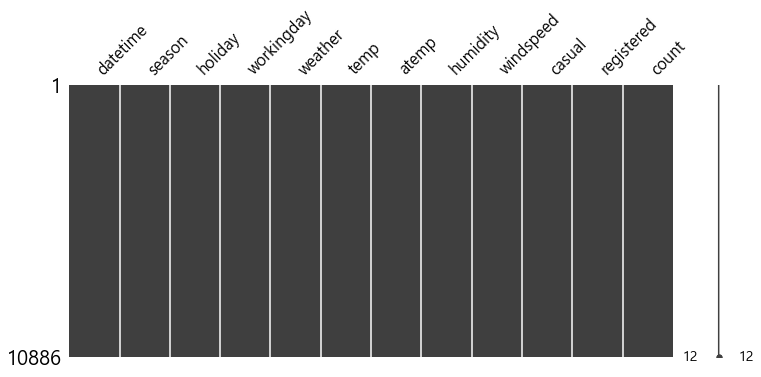

In [159]:
import missingno as msno

msno.matrix(train, figsize=(12, 5))

### datetime관련 열 추가

In [171]:
train['datetime'] = pd.to_datetime(train['datetime'])
train['year']=train['datetime'].dt.year
train['month']=train['datetime'].dt.month
train['day']=train['datetime'].dt.day
train['hour']=train['datetime'].dt.hour
train['minute']=train['datetime'].dt.minute
train['second']=train['datetime'].dt.second
train.shape
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


### 상황분석 시각화

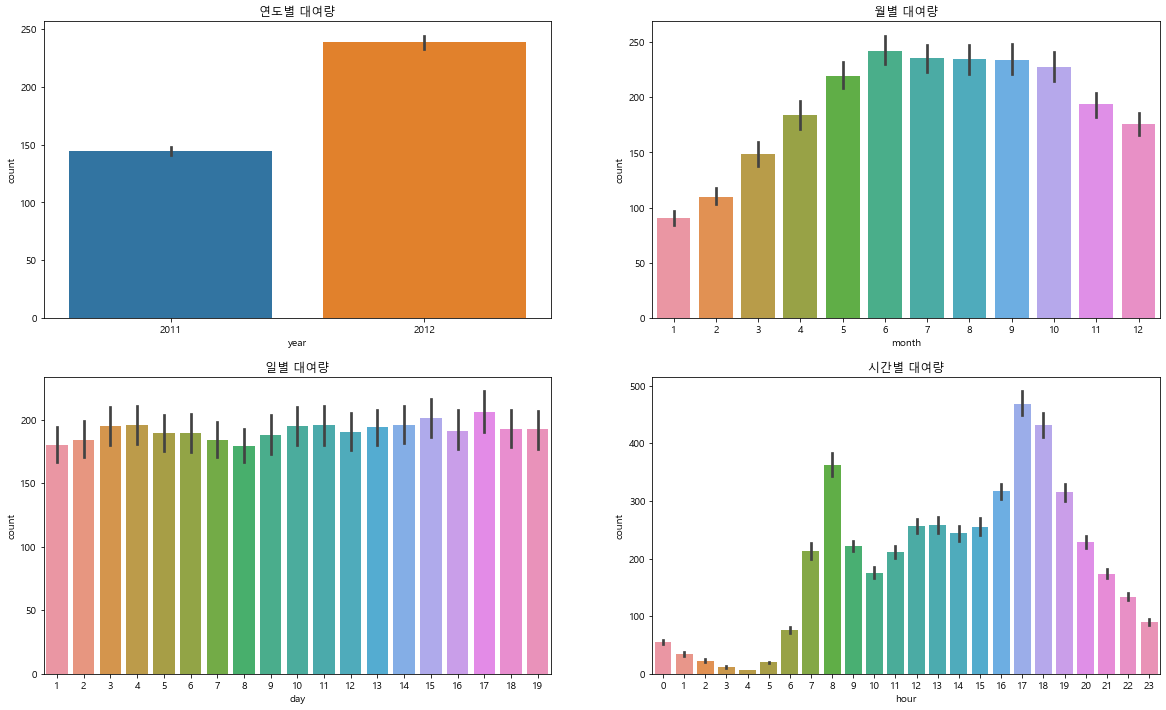

In [126]:
import platform
import warnings
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

# 한글깨짐 방지
if platform.system()=="Windows":
    font_name=font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
matplotlib.rcParams['axes.unicode_minus']=False

warnings.filterwarnings("ignore")

# 시각화
fig, axs = plt.subplots(nrows=2, ncols=2)
fig.set_size_inches(20, 12)

axs[0, 0].set(ylabel='Count', title='연도별 대여량')
axs[0, 1].set(ylabel='Count', xlabel='month', title='월별 대여량')
axs[1, 0].set(ylabel='Count', xlabel='day', title='일별 대여량')
axs[1, 1].set(ylabel='Count', xlabel='hour', title='시간별 대여량')

sns.barplot(data=train, x='year', y='count', ax=axs[0, 0])
sns.barplot(data=train, x='month', y='count', ax=axs[0, 1])
sns.barplot(data=train, x='day', y='count', ax=axs[1, 0])
sns.barplot(data=train, x='hour', y='count', ax=axs[1, 1])

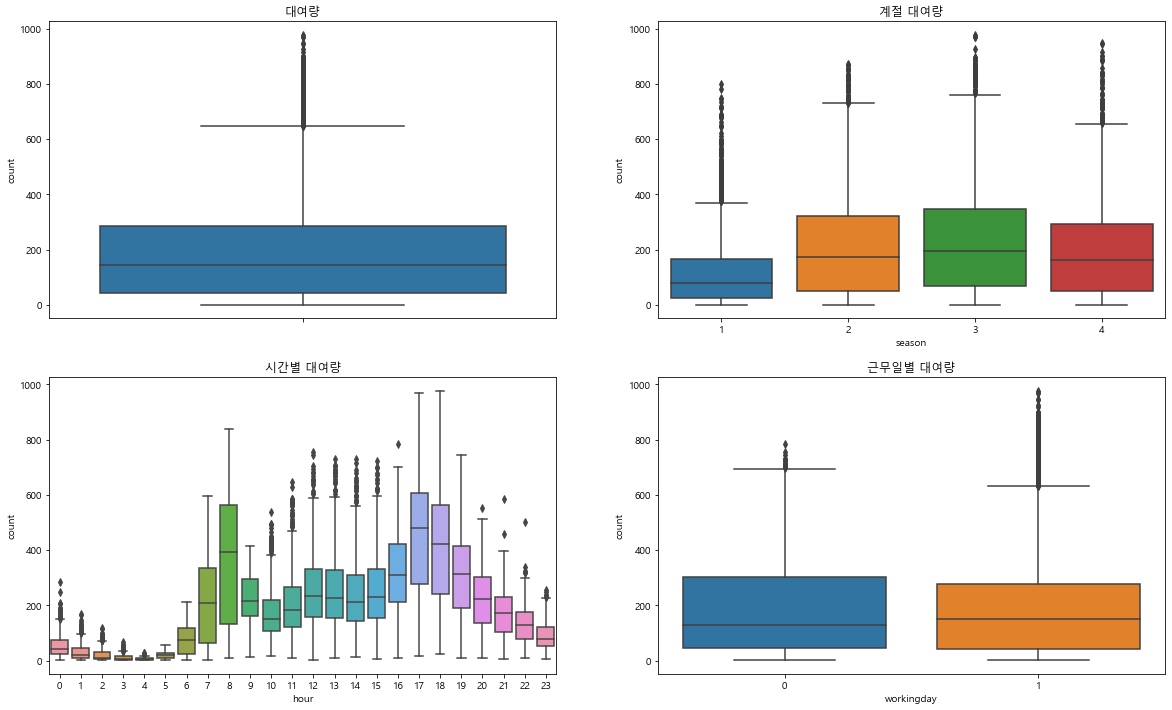

In [129]:
fig, axs = plt.subplots(nrows=2, ncols=2)
fig.set_size_inches(20, 12)

axs[0, 0].set(ylabel='Count', title='대여량')
axs[0, 1].set(ylabel='Count', xlabel='Season', title='계절 대여량')
axs[1, 0].set(ylabel='Count', xlabel='Hours of the day', title='시간별 대여량')
axs[1, 1].set(ylabel='Count', xlabel='Working day', title='근무일별 대여량')

sns.boxplot(data=train, y='count', orient='v', ax=axs[0, 0])
sns.boxplot(data=train, x='season', y='count', ax=axs[0, 1])
sns.boxplot(data=train, x='hour', y='count', ax=axs[1, 0])
sns.boxplot(data=train, x='workingday', y='count', ax=axs[1, 1])

In [130]:
train['dayofweek']=train['datetime'].dt.dayofweek
train['dayofweek'].value_counts()

5    1584
6    1579
3    1553
2    1551
0    1551
1    1539
4    1529
Name: dayofweek, dtype: int64

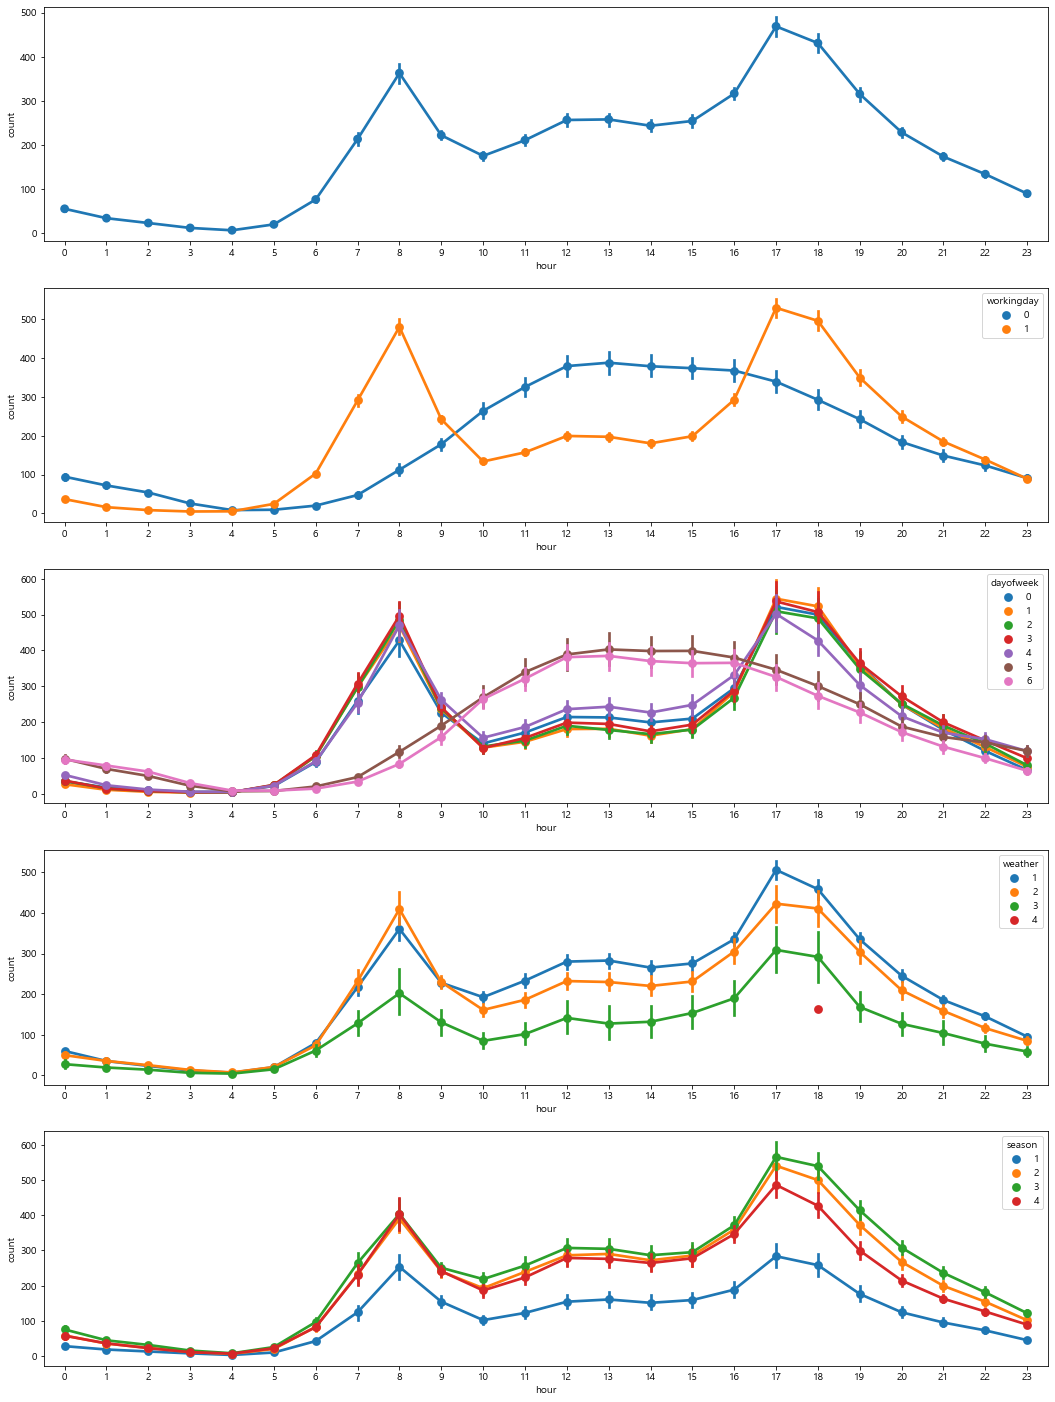

In [131]:
fig, axs = plt.subplots(nrows=5)
fig.set_size_inches(18,25)
sns.pointplot(data=train, x='hour', y='count', ax=axs[0])
sns.pointplot(data=train, x='hour', y='count',hue='workingday', ax=axs[1])
sns.pointplot(data=train, x='hour', y='count',hue='dayofweek', ax=axs[2])
sns.pointplot(data=train, x='hour', y='count',hue='weather', ax=axs[3])
sns.pointplot(data=train, x='hour', y='count',hue='season', ax=axs[4])

### 상관관계 분석

In [132]:
train_corr = train[['temp','season', 'casual', 'registered', 'humidity', 'windspeed', 'count']]
train_corr = train_corr.corr()

mask = np.array(train_corr)
mask[np.tril_indices_from(mask)] = False

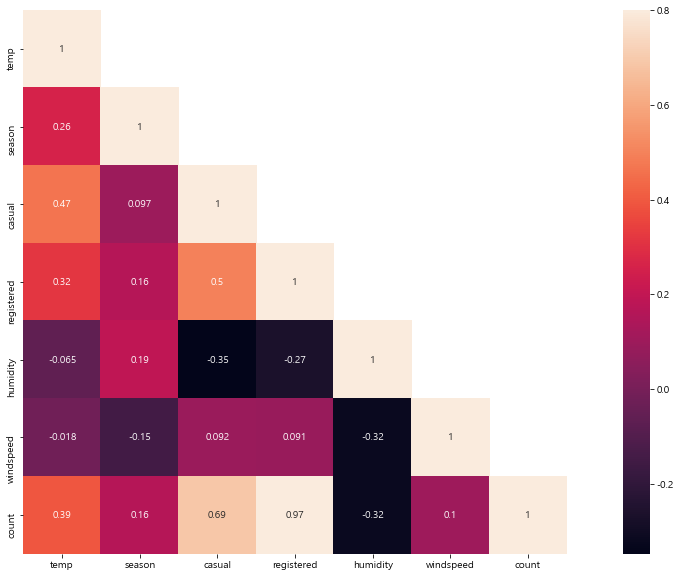

In [133]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
sns.heatmap(train_corr, square=True, annot=True, vmax=0.8, mask=mask)

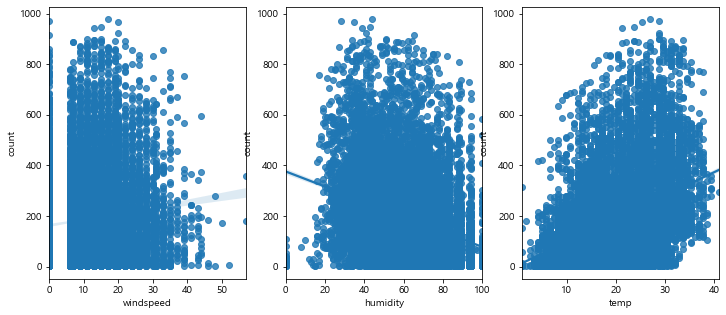

In [135]:
fig, axs = plt.subplots(1,3)
fig.set_size_inches(12, 5)

sns.regplot(x='windspeed', y='count', data=train, ax=axs[0])
sns.regplot(x='humidity', y='count', data=train, ax=axs[1])
sns.regplot(x='temp', y='count', data=train, ax=axs[2])

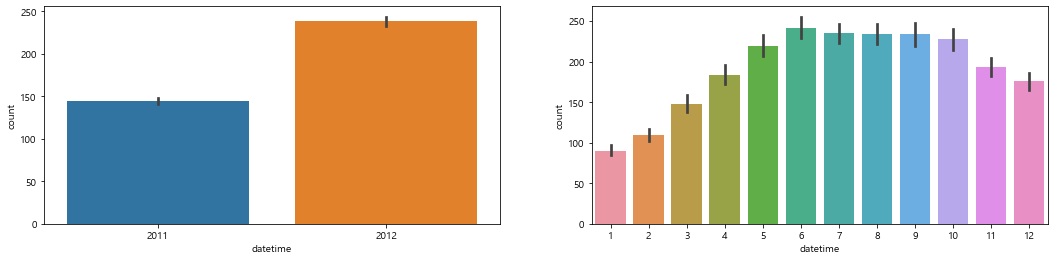

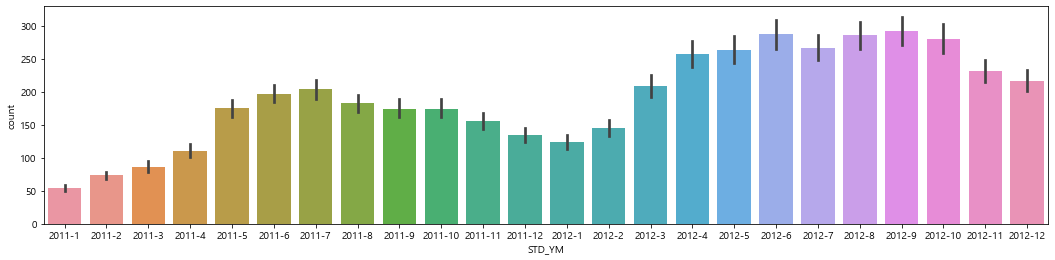

In [119]:
def cym(datetime):
    return "{0}-{1}".format(datetime.year, datetime.month)
    
train['STD_YM'] = train['datetime'].apply(cym)
train[['datetime', 'STD_YM']].head()

fig, axs = plt.subplots(ncols=2)
fig.set_size_inches(18, 4)

sns.barplot(data=train, x=train.datetime.dt.year, y='count', ax=axs[0])
sns.barplot(data=train, x=train.datetime.dt.month, y='count', ax=axs[1])

fig, axs = plt.subplots()
fig.set_size_inches(18, 4)
sns.barplot(data=train, x='STD_YM', y='count')

### 극단값(Outlier) 제거
* 극단값 정의 : 표준편차의 3배가 넘는 값

In [143]:
IQR = 3 * train['count'].std()
train_without_outliers = train[np.abs(train['count'] - train['count'].mean()) <= IQR]

# 147건의 데이터를 아웃라이어로 간주
print(train.shape[0] - train_without_outliers.shape[0])

147


### windspeed 열의 0값 대체

In [172]:
# 평균값으로 대체
mean_windspeed = train.loc[train['windspeed'] != 0, 'windspeed'].mean()
train['mean_windspeed'] = train['windspeed']
train.loc[train['mean_windspeed'] == 0, 'mean_windspeed'] = mean_windspeed

# 최소값으로 대체
min_windspeed = train.loc[train['windspeed'] != 0, 'windspeed'].min()
train['min_windspeed'] = train['windspeed']
train.loc[train['min_windspeed'] == 0, 'min_windspeed'] = min_windspeed

# 최대값으로 대체
max_windspeed = train.loc[train['windspeed'] != 0, 'windspeed'].max()
train['max_windspeed'] = train['windspeed']
train.loc[train['max_windspeed'] == 0, 'max_windspeed'] = max_windspeed

In [224]:
# 계절별 평균값으로 대체
mean_seasonal_windspeed = train.replace(0, np.nan).groupby('season')['windspeed'].mean()

def get_windspeed(season, windspeed):
    return mean_seasonal_windspeed[season] if windspeed == 0 else windspeed

train['mean_seasonal_windspeed'] = train.apply(lambda x : get_windspeed(x.season, x.windspeed), axis=1)